In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import seaborn as sb

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

# reflect the tables

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)


inspector = inspect(engine)
inspector.get_table_names()

measurement_columns = inspector.get_columns('measurement')
print("Measurement table")
for column in measurement_columns:
    print(column["name"], column["type"])
    
print("\n")
    
print("Station table")
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"], column["type"])

Measurement table
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Station table
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

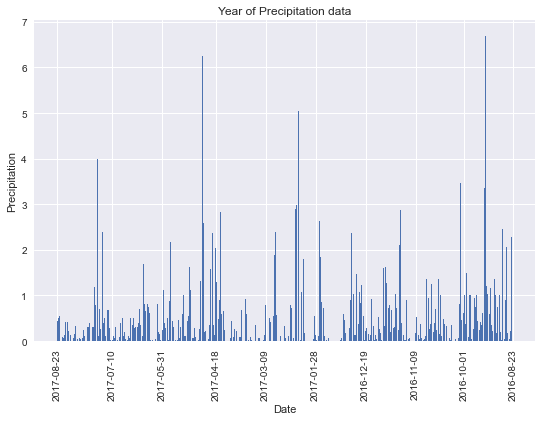

In [69]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Earliest date:
 
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

 
# query_dates = [dt.datetime(2017, 8, 23) - dt.timedelta(days=365)]
 
# Calculate the date 1 year ago from the last data point in the database


start_date = dt.datetime(2017,8,23)
end_date = dt.datetime(2016,8,23)


Year_of_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= start_date).filter(Measurement.date >= end_date).\
order_by(Measurement.date.desc()).all()



Year_of_data_df = pd.DataFrame(Year_of_data)
Year_of_data_df = Year_of_data_df.dropna()

SummaryStats = Year_of_data_df['prcp'].describe()



tick_labels = ['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10','2017-08-23']
Year_of_data_date = Year_of_data_df['date']
Year_of_data_prcp = Year_of_data_df['prcp']

plt.bar(Year_of_data_date, Year_of_data_prcp)
plt.xticks(tick_labels,rotation=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Year of Precipitation data")
plt.show()




 
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


# Use Pandas to calcualte the summary statistics for the precipitation data

In [31]:
# Design a query to show how many stations are available in this dataset?
Station_data = session.execute("SELECT * FROM station")
Station_data = pd.DataFrame(Station_data)

Year_of_data_df

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2217,2016-08-24,2.15
2218,2016-08-24,2.28
2220,2016-08-24,1.22
2221,2016-08-24,2.15


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# df.set_index(["Person", "Single"]).count(level="Person")

Station_count = session.query(Measurement.id, Measurement.station).all()
Station_count = pd.DataFrame(Station_count)
Station_count = Station_count.groupby(['station'])['id'].count().sort_values(ascending=False)
 

Station_count = pd.DataFrame(Station_count)
Station_count

# USC00519281 has the most observations

# rows = session.query(Measurement).count()
# 19550 total rows/entries

,id
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?



 
Station_Temperatures = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').group_by(Measurement.tobs).all()
                                    
Station_Average = session.query(Measurement.station, func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
# Station_Average
Station_min = session.query(Measurement.station, func.min(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
# Station_min
Station_max = session.query(Measurement.station, func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()
# Station_max

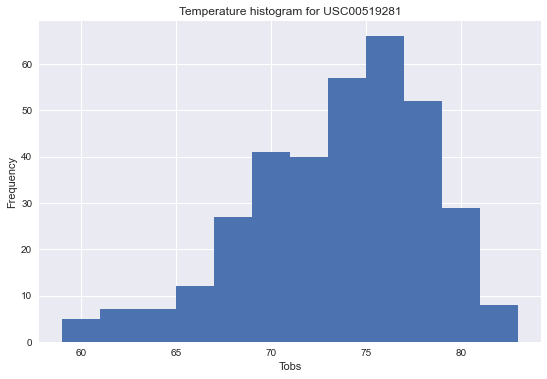

In [74]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start = dt.datetime(2017,8,23)
end = dt.datetime(2016,8,23)


Station_Over_Year = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date <= start).\
    filter(Measurement.date >= end).all()
    
Station_Over_Year = pd.DataFrame(Station_Over_Year)
Station_Over_Year= Station_Over_Year['tobs']
# Station_Over_Year

histogram = plt.hist(Station_Over_Year, bins = 12)
plt.xlabel("Tobs")
plt.ylabel("Frequency")
plt.title("Temperature histogram for USC00519281")
plt.show()




## Bonus Challenge Assignment

In [15]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [16]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [17]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [18]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [19]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [20]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [21]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [22]:
# Plot the daily normals as an area plot with `stacked=False`
